In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
data = pd.read_csv('../../1_datasets/old_datasets/processed_data/store_01.csv', parse_dates=True)
data.head(20)

,Date,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
5,2022-01-01,P0006,Groceries,South,138,128,102,139.82,76.83,10,Sunny,1,79.35,Winter
6,2022-01-01,P0007,Furniture,East,359,97,167,108.92,34.16,10,Rainy,1,36.55,Winter
7,2022-01-01,P0008,Clothing,North,380,312,54,329.73,97.99,5,Cloudy,0,100.09,Spring
8,2022-01-01,P0009,Electronics,West,183,175,135,174.15,20.74,10,Cloudy,0,17.66,Autumn
9,2022-01-01,P0010,Toys,South,108,28,196,24.47,59.99,0,Rainy,1,61.21,Winter


In [3]:
from sklearn.model_selection import train_test_split

x = data["Date"]
y = data["Units Sold"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70 : 30 split

In [4]:
from matplotlib import pyplot as plt

data = pd.to_datetime(x_train),y_train

In [5]:
y_train

11618     79
7829     265
5594      38
119        2
4859     101
        ... 
905      186
5192       8
12172    141
235       31
13349      7
Name: Units Sold, Length: 10234, dtype: int64

## Fitting ARIMA Model

 Stepwise Approach

In [6]:
from pmdarima import auto_arima
import warnings

# pip install --upgrade pandas pandasai


warnings.filterwarnings("ignore")

arima_stepwise_fit = auto_arima(x=x_train, y=y_train,
                          seasonal=False, # arima no seasonal trends
                          trace=True, # to show iterative analysis
                          # error_action='ignore',  # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)  # set to stepwise for quicker parameter finding

# To print the summary
print("Stepwise ARIMA Model Complete")
arima_stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=3.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=134666.302, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=130033.253, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=132099.155, Time=0.86 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=128494.176, Time=0.35 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=127572.676, Time=0.42 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=127074.540, Time=0.52 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=126756.948, Time=0.61 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=5.38 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=4.40 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=125102.346, Time=1.22 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=125100.347, Time=0.73 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=125098.551, Time=0.58 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=125099.110, Time=0.93 sec
 ARIMA(3,0,1)(0,0,0)[0] in

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10234
Model:               SARIMAX(3, 0, 0)   Log Likelihood              -62544.275
Date:                Sun, 26 Jan 2025   AIC                         125098.551
Time:                        00:43:03   BIC                         125134.718
Sample:                             0   HQIC                        125110.779
                              - 10234                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    136.8859      2.750     49.769      0.000     131.495     142.277
ar.L1         -0.0099      0.010     -0.998      0.318      -0.029       0.010
ar.L2         -0.0140      0.010     -1.397      0.162      -0.034       0.006
ar.L3          0.0158      0.010      1.631      0.103      -0.003       0.035
sigma2      1.191e+04    212.328     56.086      0.000    1.15e+04    1.23e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1446.50
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.92
Prob(H) (two-sided):                  0.78   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Non-Stepwise (Parallelized (slower)) Approach

In [7]:
from pmdarima import auto_arima
import warnings

# pip install --upgrade pandas pandasai


warnings.filterwarnings("ignore")

arima_non_stepwise_fit = auto_arima(x=x_train, y=y_train,
                                seasonal=False,  # arima no seasonal trends
                                trace=True,  # to show iterative analysis
                                # error_action='ignore',  # we don't want to know if an order does not work
                                suppress_warnings=True,  # we don't want convergence warnings
                                stepwise=False)  # set to stepwise for quicker parameter finding

# To print the summary
print("Non Stepwise ARIMA Model Complete")
arima_non_stepwise_fit.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=134666.302, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=132099.155, Time=0.70 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=130933.162, Time=1.09 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=130103.983, Time=1.64 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=129504.261, Time=1.97 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=129054.072, Time=2.46 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=130033.253, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=1.86 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=3.34 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=4.20 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=5.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=128494.176, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=3.30 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=2.90 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=4.24 sec
 ARIMA(3,0,0)(0,0,0)[0]      

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10234
Model:               SARIMAX(5, 0, 0)   Log Likelihood              -63372.474
Date:                Sun, 26 Jan 2025   AIC                         126756.948
Time:                        00:43:51   BIC                         126800.349
Sample:                             0   HQIC                        126771.622
                              - 10234                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1655      0.010     16.666      0.000       0.146       0.185
ar.L2          0.1642      0.010     16.431      0.000       0.145       0.184
ar.L3          0.1992      0.010     20.797      0.000       0.180       0.218
ar.L4          0.1826      0.010     18.634      0.000       0.163       0.202
ar.L5          0.1754      0.010     17.793      0.000       0.156       0.195
sigma2        1.4e+04    199.278     70.252      0.000    1.36e+04    1.44e+04
===================================================================================
Ljung-Box (L1) (Q):                  17.64   Jarque-Bera (JB):               858.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.71
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Fitting SARIMAX Model

Stepwise

In [8]:
from pmdarima import auto_arima
import warnings
# pip install --upgrade pandas pandasai
# SARIMAX

warnings.filterwarnings("ignore")

sarimax_stepwise_fit = auto_arima(x=x_train,y=y_train, start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          stationary=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',  # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)  # set to stepwise

# To print the summary
sarimax_stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=125103.027, Time=3.53 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=125098.203, Time=0.14 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=125101.084, Time=2.93 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=125101.071, Time=2.49 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=134666.302, Time=0.12 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=125100.084, Time=3.44 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=125100.079, Time=1.67 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=18.19 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=125099.161, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=125099.199, Time=0.40 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=125101.156, Time=0.49 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 33.704 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10234
Model:                        SARIMAX   Log Likelihood              -62547.101
Date:                Sun, 26 Jan 2025   AIC                         125098.203
Time:                        00:44:25   BIC                         125112.670
Sample:                             0   HQIC                        125103.094
                              - 10234                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    135.7875      1.403     96.784      0.000     133.038     138.537
sigma2      1.191e+04    212.460     56.079      0.000    1.15e+04    1.23e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):              1450.85
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.92
Prob(H) (two-sided):                  0.75   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Non-Stepwise (Parallelized (slower)) SARIMAX

In [ ]:
from pmdarima import auto_arima
import warnings

# pip install --upgrade pandas pandasai


warnings.filterwarnings("ignore")

sarimax_non_stepwise_fit = auto_arima(x=x_train, y=y_train, start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',  # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=False)  # set to non-stepwise

# To print the summary
sarimax_non_stepwise_fit.summary()

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=132067.057, Time=1.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=13.17 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=37.60 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=129189.041, Time=7.38 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=20.87 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=32.47 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=127960.638, Time=26.78 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=39.59 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=50.34 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=132068.442, Time=1.69 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=15.93 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=43.94 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=129190.028, Time=10.87 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=22.40 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=43.08 sec
 ARIMA(0,0,1)(2,1,0)[12

In [ ]:
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Finding Best Fit

KeyError: 'Units Sold'

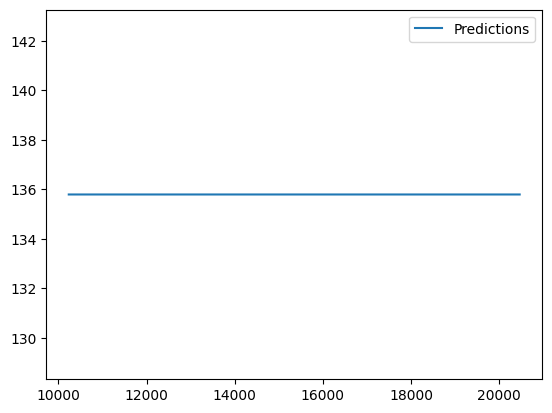

In [13]:
start = len(x_train)
end = len(x_train) + len(x_test) - 1

# Predictions for one-year against the test set
predictions = sarimax_stepwise_fit.predict(start, end,
                             typ='levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend=True)
y_test["Units Sold"].plot(legend=True)

In [10]:
y_test

12478      0
10831    126
153      142
6008     375
10550    319
        ... 
13213     19
202        9
2556     100
7756     324
3484     159
Name: Units Sold, Length: 4386, dtype: int64